In [1]:
# importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [3]:
def metrics(y_actual, y_fitted):
    RSQ = r2_score(y_actual,y_fitted)
    MDAE = median_absolute_error (y_actual,y_fitted)
    MSE = mean_squared_error(y_actual,y_fitted)
    MEAE = mean_absolute_error(y_actual,y_fitted)
    MAPE = mean_absolute_percentage_error(y_actual,y_fitted)
    print (f'R-square : {np.round(RSQ,5)}')
    print (f'Median absolute error : {np.round(MDAE,5)}')
    print (f'Mean squared error : {np.round(MSE, 5)}')
    print (f'Mean absolute error : {np.round(MEAE, 5)}')
    print (f'Mean absolute percentage error : {np.round(MAPE, 5)}')
    

## Exponential smoothing forecast


## Exchange Rates, (Average For Period), Monthly

In [4]:
# loading data into data frame
data1 = pd.read_csv('Variable 1.csv',index_col= 0, header= 0,
                    parse_dates=True, squeeze=True) #loadig variable 1 as stated above
data1 = pd.DataFrame(data1)
data1.head()

,US_Dollar
Time,
2000-01-01,1.6733
2000-02-01,1.7005
2000-03-01,1.7152
2000-04-01,1.7097
2000-05-01,1.7281


In [5]:
# descriptive statistics
data1.describe()

,US_Dollar
count,259.000000
mean,1.471836
std,0.184374
min,1.208800
25%,1.340500
50%,1.398400
75%,1.657850
max,1.838800


In [6]:
#to check the missing value
data1.isnull().sum()

 US_Dollar     0
dtype: int64

In [7]:

y1 = data1.iloc[:, -1].values 

In [8]:
model1 = ExponentialSmoothing(data1, initialization_method= 'estimated',seasonal_periods= 4,
                                trend='add', seasonal='add',).fit(optimized= True)
output1 = model1.forecast(9) #forcast from aug to march 2022

fitted_output1 = model1.fittedvalues

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


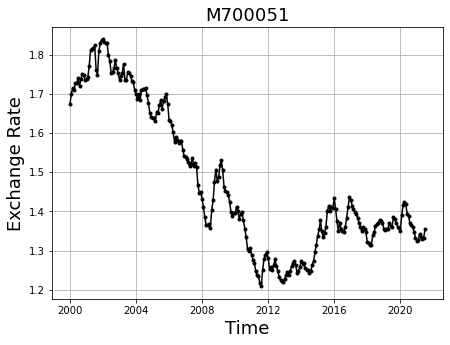

In [9]:
# visualization of the trend in the data set 
plt.figure(figsize=[7,5])
plt.plot(data1.index, y1, marker = '.', color = 'black',)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Exchange Rate', fontsize = 18)
plt.title('M700051',fontsize = 18)
plt.grid()
plt.show()

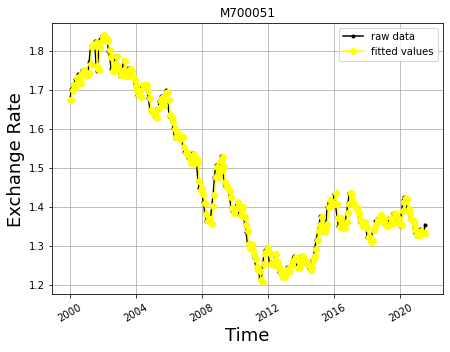

In [10]:
# visualizing the actual and predicted value
plt.figure(figsize=[7,5])
plt.plot(data1.index, y1, marker = '.', color = 'black',)
plt.plot(fitted_output1, marker = 'o', color = 'yellow')
plt.legend (['raw data', 'fitted values'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Exchange Rate', fontsize = 18)
plt.title('M700051')
plt.xticks(rotation = 30)
plt.grid()
plt.show()

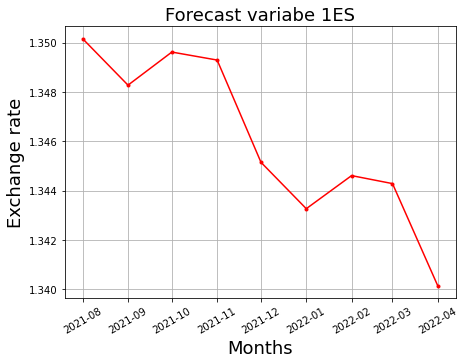

In [11]:
#visualizing the forecast values
plt.figure(figsize=[7, 5])
plt.plot(output1, marker = '.', color = 'red')
plt.xticks(rotation = 30)
plt.title('Forecast variabe 1ES',fontsize = 18)
plt.ylabel('Exchange rate',fontsize = 18)
plt.xlabel('Months',fontsize = 18)
plt.grid()
plt.show()

In [12]:
#model summary 
model1.summary()

Dep. Variable:,US_Dollar,No. Observations:,259
Model:,ExponentialSmoothing,SSE,0.077
Optimized:,True,AIC,-2087.554
Trend:,Additive,BIC,-2059.099
Seasonal:,Additive,AICC,-2086.667
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:57:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


Dep. Variable:,US_Dollar,No. Observations:,259
Model:,ExponentialSmoothing,SSE,0.077
Optimized:,True,AIC,-2087.554
Trend:,Additive,BIC,-2059.099
Seasonal:,Additive,AICC,-2086.667
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:57:21
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


In [13]:
# model evalustion
eval_model1 = metrics(y1, fitted_output1)

R-square : 0.99123
Median absolute error : 0.01148
Mean squared error : 0.0003
Mean absolute error : 0.01341
Mean absolute percentage error : 0.00915
R-square : 0.99123
Median absolute error : 0.01148
Mean squared error : 0.0003
Mean absolute error : 0.01341
Mean absolute percentage error : 0.00915


## M601641 Retail Sales Index, (2017 = 100), At Current Prices, Monthly Total

In [12]:
#loading the data into the dataframe
data2 = pd.read_csv('Variable 2.csv',index_col= 0, header= 0,
                    parse_dates=True, squeeze=True) #loadig variable 2 as stated above
data2 = pd.DataFrame(data2)
data2.head()

,Total
Times,
2000-01-01,74.953
2000-02-01,49.519
2000-03-01,60.789
2000-04-01,61.409
2000-05-01,63.113


In [13]:
#descriptive statistics
data2.describe()

,Total
count,258.000000
mean,88.363698
std,13.303728
min,47.203000
25%,82.684250
50%,90.826500
75%,96.493500
max,119.406000


In [14]:
#to check the missing value
data2.isnull().sum()

Total    0
dtype: int64

In [15]:
#building the model
model2 = ExponentialSmoothing(data2, initialization_method= 'estimated',
                              seasonal_periods= 4, trend='add', seasonal='mul',).fit(optimized= True,)
                                                                                
output2 = model2.forecast(9) #forcast from aug to march 2022
fitted_output2= model2.fittedvalues #fitted values of the model


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
y2 = data2.iloc[:, -1].values

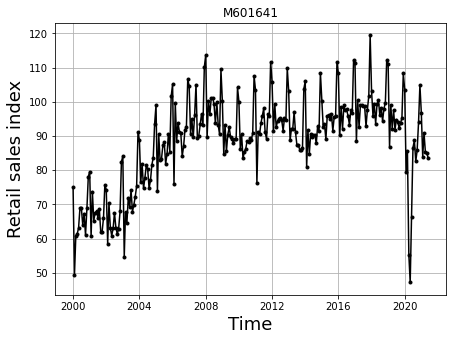

In [17]:
#visualizing the data trend
plt.figure(figsize=[7,5])
plt.plot(data2.index, y2, marker = '.', color = 'black',)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Retail sales index', fontsize = 18)
plt.title('M601641')
plt.grid()
plt.show()

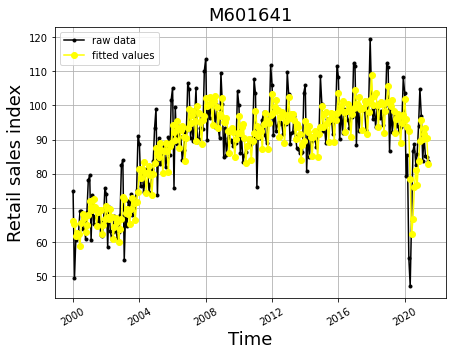

In [18]:
# visualizing the actual values and pricted values
plt.figure(figsize=[7,5])
plt.plot(data2.index, y2, marker = '.', color = 'black',)
plt.plot(fitted_output2, marker = 'o', color = 'yellow')

plt.legend (['raw data', 'fitted values', 'forecast values'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Retail sales index', fontsize = 18)
plt.title('M601641',fontsize = 18)

plt.xticks(rotation = 30)

plt.grid()
plt.show()

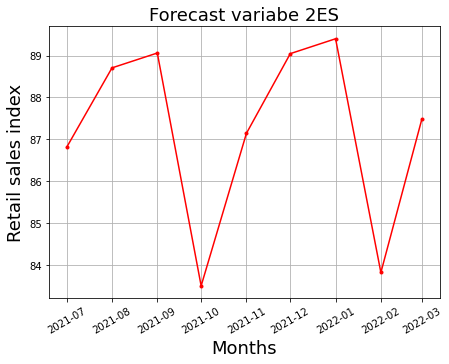

In [19]:
# visualizing the forecast
plt.figure(figsize=[7,5])
plt.plot(output2, marker = '.', color = 'red')
plt.xticks(rotation = 30)
plt.title('Forecast variabe 2ES',fontsize = 18)
plt.ylabel('Retail sales index',fontsize = 18)
plt.xlabel('Months',fontsize = 18)
plt.grid()
plt.show()

In [23]:
#model summary 
model2.summary()

Dep. Variable:,Total,No. Observations:,258
Model:,ExponentialSmoothing,SSE,15588.914
Optimized:,True,AIC,1074.150
Trend:,Additive,BIC,1102.573
Seasonal:,Multiplicative,AICC,1075.040
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:59:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3838161,alpha,True
smoothing_trend,1.8109e-09,beta,True


Dep. Variable:,Total,No. Observations:,258
Model:,ExponentialSmoothing,SSE,15588.914
Optimized:,True,AIC,1074.150
Trend:,Additive,BIC,1102.573
Seasonal:,Multiplicative,AICC,1075.040
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:59:20
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3838161,alpha,True
smoothing_trend,1.8109e-09,beta,True


In [20]:
# evaluation of the model
eval_model2 = metrics(y2, fitted_output2)

R-square : 0.65728
Median absolute error : 4.61335
Mean squared error : 60.42215
Mean absolute error : 5.85976
Mean absolute percentage error : 0.06942


# M212751 Singapore Manufactured Products Price Index, By Commodity


In [21]:
#loading the data into dataframe 
data3 = pd.read_csv('Variable 3.csv',index_col= 0, header= 0,
                    parse_dates=True, squeeze=True) #loadig variable 3 as stated above
data3 = pd.DataFrame(data3)
data3.head()

,Overall Items
Times,
2000-01-01,112.543
2000-02-01,113.725
2000-03-01,116.624
2000-04-01,116.693
2000-05-01,115.119


In [22]:
#descriptive statistics
data3.describe()

,Overall Items
count,259.000000
mean,108.098274
std,10.184512
min,87.338000
25%,98.765500
50%,109.306000
75%,116.035500
max,135.277000


In [23]:
#to check the missing value
data3.isnull().sum()

 Overall Items    0
dtype: int64

In [24]:
# building the model
model3 = ExponentialSmoothing(data3, initialization_method= 'estimated',
                              seasonal_periods= 4, trend='add', seasonal='mul',).fit(optimized= True)
output3 = model3.forecast(9) #forcast from aug to march 3033
fitted_output3 = model3.fittedvalues


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [25]:
y3 = data3.iloc[:, -1].values
y3

array([112.543, 113.725, 116.624, 116.693, 115.119, 115.743, 118.188,
       117.125, 120.006, 120.313, 121.032, 118.072, 117.292, 117.083,
       117.187, 118.359, 118.625, 118.178, 117.084, 116.277, 114.23 ,
       113.928, 111.45 , 111.199, 108.607, 108.564, 109.674, 110.475,
       109.408, 108.059, 106.109, 106.016, 107.437, 106.098, 107.466,
       106.8  , 106.918, 109.028, 110.161, 108.808, 105.874, 106.184,
       105.979, 106.842, 106.028, 105.307, 106.689, 107.011, 107.984,
       109.29 , 109.306, 108.179, 110.35 , 110.693, 111.45 , 114.375,
       115.557, 116.777, 116.282, 113.293, 111.725, 112.898, 116.98 ,
       118.975, 117.336, 118.03 , 119.132, 120.597, 123.476, 122.208,
       119.314, 119.076, 122.259, 121.361, 121.341, 122.541, 122.289,
       123.904, 124.511, 123.833, 120.97 , 118.29 , 116.235, 115.686,
       113.998, 115.275, 116.747, 118.1  , 119.519, 120.204, 119.964,
       119.168, 120.131, 120.422, 123.478, 123.571, 122.406, 122.561,
       124.113, 125.

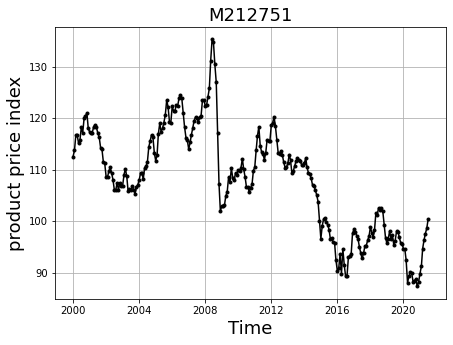

In [30]:
# visualizing the data trend
plt.figure(figsize=[7,5])
plt.plot(data3.index, y3, marker = '.', color = 'black',)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('product price index', fontsize = 18)
plt.title('M212751',fontsize = 18)
plt.grid()
plt.show()

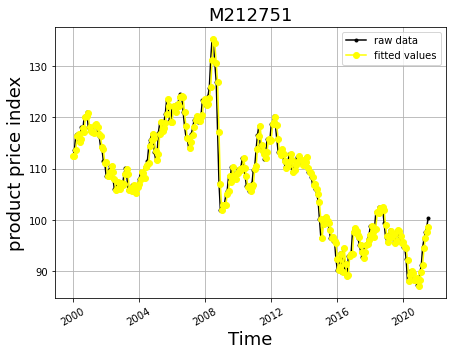

In [29]:
#visualizing the actual values and pricted values
plt.figure(figsize=[7,5])
plt.plot(data3.index, y3, marker = '.', color = 'black',)
plt.plot(fitted_output3, marker = 'o', color = 'yellow')


plt.legend (['raw data', 'fitted values', 'forecast values'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('product price index', fontsize = 18)
plt.title('M212751',fontsize = 18)

plt.xticks(rotation = 30)

plt.grid()
plt.show()

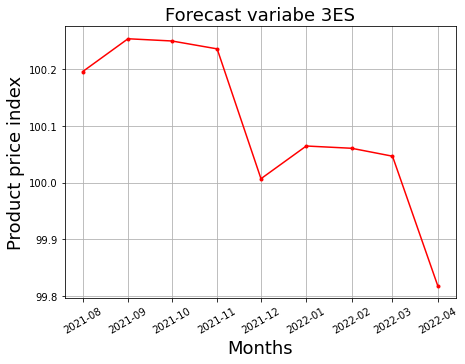

In [28]:
plt.figure(figsize=[7,5])
plt.plot(output3, marker = '.', color = 'red')
plt.xticks(rotation = 30)
plt.title('Forecast variabe 3ES',fontsize = 18)
plt.ylabel('Product price index',fontsize = 18)
plt.xlabel('Months',fontsize = 18)
plt.grid()
plt.show()

In [33]:
#model summary
model3.summary()

Dep. Variable:,Overall Items,No. Observations:,259
Model:,ExponentialSmoothing,SSE,953.102
Optimized:,True,AIC,353.449
Trend:,Additive,BIC,381.904
Seasonal:,Multiplicative,AICC,354.337
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:59:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.1236e-13,beta,True


Dep. Variable:,Overall Items,No. Observations:,259
Model:,ExponentialSmoothing,SSE,953.102
Optimized:,True,AIC,353.449
Trend:,Additive,BIC,381.904
Seasonal:,Multiplicative,AICC,354.337
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,09:59:45
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,1.1236e-13,beta,True


In [31]:
#evaluation of the model 
eval_model3 = metrics(y3, fitted_output3)

R-square : 0.96438
Median absolute error : 1.10224
Mean squared error : 3.67993
Mean absolute error : 1.40679
Mean absolute percentage error : 0.01308


# M355271 Index Of Industrial Production (2019 = 100), Monthly Total


In [32]:
# loading data into the dataframe 
data4 = pd.read_csv('Variable 4.csv',index_col= 0, header= 0,
                    parse_dates=True, squeeze=True) #loadig variable 4 as stated above
data4 = pd.DataFrame(data4)
data4.head()

,Total
Times,
2000-01-01,42.451
2000-02-01,35.246
2000-03-01,43.489
2000-04-01,38.037
2000-05-01,43.879


In [33]:
#desciptive statistics
data4.describe()

,Total
count,259.000000
mean,73.275166
std,22.735929
min,34.532000
25%,51.927500
50%,77.464000
75%,88.950500
max,127.967000


In [34]:
#to check the missing value
data4.isnull().sum()

Total    0
dtype: int64

In [35]:
model4 = ExponentialSmoothing(data4, initialization_method= 'estimated',
                              seasonal_periods= 4, trend='add', seasonal='mul',).fit(optimized= True)
output4 = model4.forecast(9) #forcast from aug to march 4044
fitted_output4= model4.fittedvalues


C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [36]:
y4 = data4.iloc[:, -1].values
y4

array([ 42.451,  35.246,  43.489,  38.037,  43.879,  46.085,  43.036,
        46.865,  49.656,  49.072,  46.865,  49.201,  37.972,  40.049,
        46.475,  38.426,  39.465,  38.622,  37.128,  36.934,  38.622,
        38.945,  40.763,  38.426,  39.011,  35.246,  44.593,  41.607,
        44.852,  45.762,  44.139,  43.099,  43.165,  43.749,  40.309,
        46.021,  44.333,  34.532,  47.319,  39.984,  40.958,  42.97 ,
        41.348,  47.773,  45.696,  52.057,  43.619,  46.345,  47.189,
        44.333,  47.579,  48.617,  49.007,  51.149,  48.812,  49.72 ,
        51.343,  52.706,  48.228,  61.274,  52.252,  39.595,  51.798,
        50.565,  49.916,  56.926,  51.798,  55.628,  62.768,  62.702,
        58.418,  64.649,  52.252,  53.68 ,  64.26 ,  51.538,  54.979,
        69.648,  62.119,  58.613,  66.856,  64.975,  68.025,  68.349,
        60.366,  56.536,  64.26 ,  62.897,  64.13 ,  62.248,  77.567,
        67.246,  64.845,  67.181,  66.077,  65.623,  65.364,  62.312,
        75.684,  59.

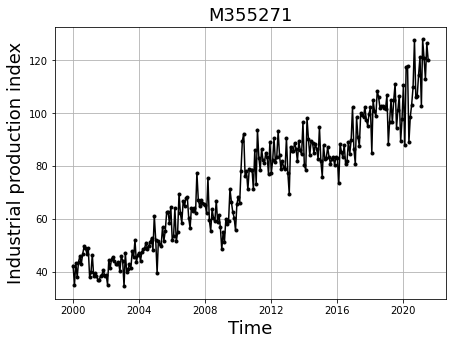

In [41]:
# visualizing the data trends
plt.figure(figsize=[7,5])
plt.plot(data4.index, y4, marker = '.', color = 'black',)
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Industrial production index', fontsize = 18)
plt.title('M355271', fontsize = 18)
plt.grid()
plt.show()

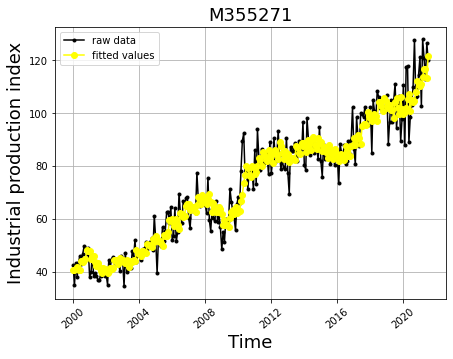

In [42]:
# visualizing the actual values and fitted values
plt.figure(figsize=[7,5])
plt.plot(data4.index, y4, marker = '.', color = 'black',)
plt.plot(fitted_output4, marker = 'o', color = 'yellow')
plt.title('M355271', fontsize = 18)

plt.legend (['raw data', 'fitted values'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Industrial production index', fontsize = 18)
plt.xticks(rotation = 40)

plt.grid()
plt.show()

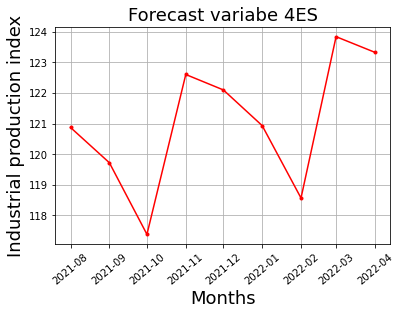

In [40]:
#visualizing the forecast values
plt.plot(output4, marker = '.', color = 'red')
plt.xticks(rotation = 40)
plt.title('Forecast variabe 4ES', fontsize = 18)
plt.ylabel('Industrial production index', fontsize = 18)
plt.xlabel('Months', fontsize = 18)
plt.grid()
plt.show()

In [46]:
# model summary
model4.summary()

Dep. Variable:,Total,No. Observations:,259
Model:,ExponentialSmoothing,SSE,10304.989
Optimized:,True,AIC,970.041
Trend:,Additive,BIC,998.495
Seasonal:,Multiplicative,AICC,970.928
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,10:01:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2397352,alpha,True
smoothing_trend,1.4147e-06,beta,True


Dep. Variable:,Total,No. Observations:,259
Model:,ExponentialSmoothing,SSE,10304.989
Optimized:,True,AIC,970.041
Trend:,Additive,BIC,998.495
Seasonal:,Multiplicative,AICC,970.928
Seasonal Periods:,4,Date:,"Wed, 01 Sep 2021"
Box-Cox:,False,Time:,10:01:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2397352,alpha,True
smoothing_trend,1.4147e-06,beta,True


In [43]:
# evalaution of the model
eval_model4 = metrics(y4, fitted_output4)

R-square : 0.92273
Median absolute error : 3.89495
Mean squared error : 39.7876
Mean absolute error : 4.81405
Mean absolute percentage error : 0.0679


# ARIMA


In [51]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
from scipy import stats
from pandas.plotting import autocorrelation_plot

# VARIABLE 1

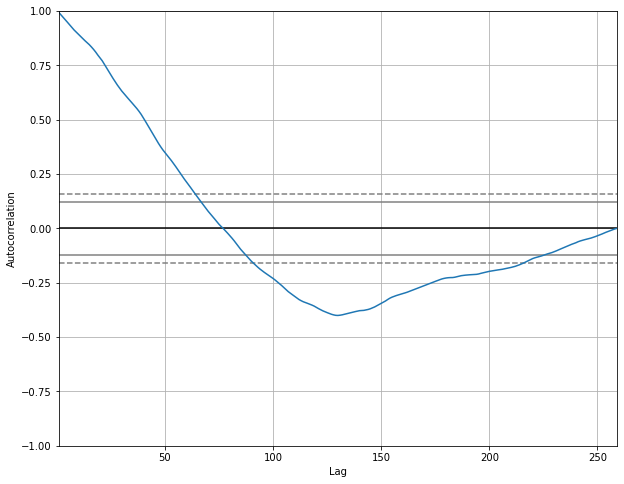

In [52]:
plt.figure(figsize=[10,8])
autocorrelation_plot(data1)
plt.show()

In [53]:
# since the autocorrelaction is positive for the first 50 lags therefore, there is difeerence in the data

In [54]:
# to ceck if the data is stationary 
# Null hypothesis: the data is not stationary
# alternative hypothesis data is stationary @ p-value less than 0.05
from statsmodels.tsa.stattools import adfuller
from numpy import log
k = data1.iloc[:,-1].values # variable value 
result = adfuller(data1.iloc[:,-1].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.316358
p-value: 0.621656


In [55]:
# data is stationary wit p-value greater than 0.05
# hence, d = 1

C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 576x720 with 0 Axes>

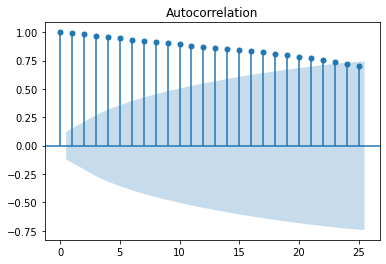

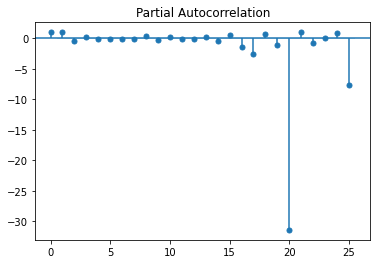

In [56]:
# autocorrelation (q) and partial correlaction (q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = [8,10])
b_acf = plot_acf(k ) # autocoreelation plot of the value
b_pacf = plot_pacf(k) # partia correlaction plot

In [57]:
#from the  autocorrelation q = 1 because is above the significant line
# from the partial autocorrelation p = 1

In [58]:
#building the model 
model_arima = ARIMA(data1, order=(1,1,0)).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
#model summary
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             US_Dollar    No. Observations:                  259
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 691.271
Date:                Wed, 01 Sep 2021   AIC                          -1378.542
Time:                        21:24:41   BIC                          -1371.436
Sample:                    01-01-2000   HQIC                         -1375.684
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3045      0.063      4.824      0.000       0.181       0.428
sigma2         0.0003   1.92e-05     14.326      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                21.83
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

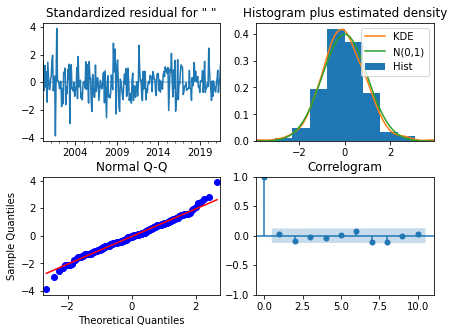

In [62]:
# resudual plots
model_arima.plot_diagnostics(figsize=(7,5))
plt.subplots_adjust(hspace=0.3)
plt.show()

In [61]:
# fitting and forecasting 
arima_fitted = model_arima.fittedvalues # fitted value from arima model
forecast_arima = model_arima.forecast(8, alpha=0.05) # forecast value from arima model 

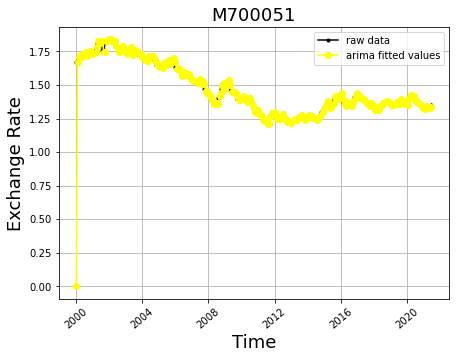

In [64]:
# visualizing the actual and fitted values
plt.figure(figsize=[7,5])
plt.plot(data1.index, y1, marker = '.', color = 'black',)
plt.plot(arima_fitted, marker = 'o', color = 'yellow')

plt.legend (['raw data', 'arima fitted values', ])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Exchange Rate', fontsize = 18)
plt.title('M700051', fontsize = 18)

plt.xticks(rotation = 40)

plt.grid()
plt.show()

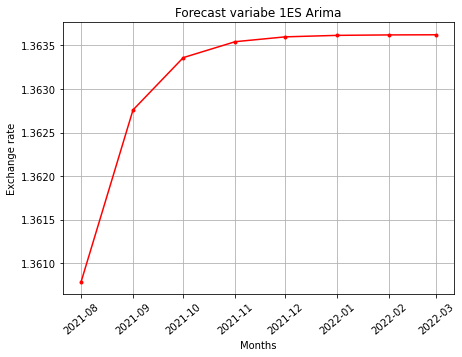

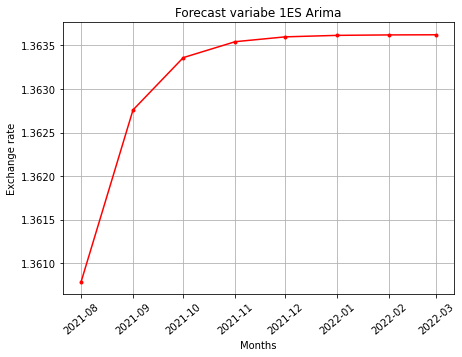

In [60]:
#visualizing the forecast with ARIMA
plt.figure(figsize=[7,5])
plt.plot(forecast_arima, marker = '.', color = 'red')
plt.xticks(rotation = 40)
plt.title('Forecast variabe 1ES Arima')
plt.ylabel('Exchange rate')
plt.xlabel('Months')
plt.grid()
plt.show()

In [63]:
#evaluating the arima model
arima_eval = metrics(y1, arima_fitted)

R-square : 0.67264
Median absolute error : 0.01033
Mean squared error : 0.01109
Mean absolute error : 0.01907
Mean absolute percentage error : 0.01243


# Multiple Linear Regression

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme(color_codes=True)

In [66]:
# loading the data 
data_ml = pd.read_csv('regress.csv', header= 0)
data_ml = pd.DataFrame(data_ml)

In [67]:
data_ml.head(10)

,var1,var2,var3,var4,bankcrupt
0,1.7289,75.397,106.689,43.619,437
1,1.7107,91.077,107.011,46.345,410
2,1.6987,88.728,107.984,47.189,462
3,1.6861,76.577,109.290,44.333,421
4,1.6997,81.780,109.306,47.579,396
5,1.6840,74.685,108.179,48.617,434
6,1.7101,77.734,110.350,49.007,476
7,1.7123,81.441,110.693,51.149,482
8,1.7120,80.331,111.450,48.812,433
9,1.7144,74.743,114.375,49.720,440


In [68]:
data_ml.describe()

,var1,var2,var3,var4,bankcrupt
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.409366,92.981294,107.281725,79.514280,256.251185
std,0.136525,9.370888,10.814690,18.989519,71.552900
min,1.208800,47.203000,87.338000,39.595000,43.000000
25%,1.317650,88.575500,97.271000,63.903000,208.000000
50%,1.371700,92.615000,109.040000,81.867000,250.000000
75%,1.477050,98.368000,115.566000,90.711500,291.000000
max,1.728900,119.406000,135.277000,127.967000,482.000000


<AxesSubplot:xlabel='var4', ylabel='Count'>

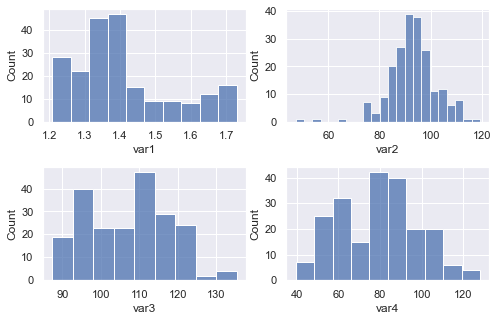

In [69]:
# visualizing the variables 
plt.figure(figsize=[8,5])
plt.subplots_adjust(hspace= 0.4)
plt.subplot(221)
sns.histplot(data_ml.var1)

plt.subplot(222)
sns.histplot(data_ml.var2)

plt.subplot(223)
sns.histplot(data_ml.var3)

plt.subplot(224)
sns.histplot(data_ml.var4)

In [70]:
# standardize the data 
x = data_ml.drop(columns= 'bankcrupt')
y_act = data_ml.bankcrupt.values

ss = StandardScaler()
x_ss = ss.fit_transform(x)

In [71]:
ml_reg = LinearRegression()
ml_reg.fit(x_ss, y_act)

LinearRegression()

In [72]:
# y_pred
y_pred = ml_reg.predict(x_ss)

In [73]:
metrics(y_act,y_pred)

R-square : 0.35411
Median absolute error : 34.81466
Mean squared error : 3291.19174
Mean absolute error : 42.99644
Mean absolute percentage error : 0.20154


In [74]:
ml_reg.score(x_ss, y_act)

0.35410509377933197

In [75]:
# coefficent and intercept
ml_reg.coef_, ml_reg.intercept_

(array([46.82832267,  3.55248051,  3.69908538,  7.01485253]),
 256.2511848341232)

<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

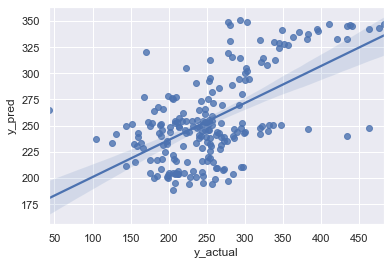

In [76]:
#plt.scatter(y_act, y_pred)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
sns.regplot(x = y_act, y = y_pred, )

In [79]:
fp = f_regression(x_ss, y_act)

In [82]:
# result sof first trial
result_ml = pd.DataFrame(fp, index=['F-value','P-value'], columns=['var1','var2', 'var3', 'var4'])

In [83]:
result_ml

,var1,var2,var3,var4
F-value,1.117790e+02,3.163816,6.464776,3.248428e+01
P-value,3.336390e-21,0.076741,0.011727,4.054981e-08


In [84]:
# the r2 value is low and variable var2 and var3 are not significant to the model

# Second trial 

In [85]:
#dropping var 2 and var 4
x_2 = data_ml[['var1', 'var4']]

In [86]:
x_2_ss = ss.fit_transform(x_2)

In [87]:
x_2_ss

array([[ 2.34604058e+00, -1.89476326e+00],
       [ 2.21241478e+00, -1.75086901e+00],
       [ 2.12430986e+00, -1.70631774e+00],
       [ 2.03179969e+00, -1.85707416e+00],
       [ 2.13165193e+00, -1.68573125e+00],
       [ 2.01638133e+00, -1.63093953e+00],
       [ 2.20800953e+00, -1.61035304e+00],
       [ 2.22416210e+00, -1.49728573e+00],
       [ 2.22195948e+00, -1.62064628e+00],
       [ 2.23958046e+00, -1.57271672e+00],
       [ 2.10448625e+00, -1.48704527e+00],
       [ 1.97086045e+00, -1.41509814e+00],
       [ 1.77409280e+00, -1.65147323e+00],
       [ 1.70434307e+00, -9.62828877e-01],
       [ 1.67938001e+00, -1.43906292e+00],
       [ 1.67864580e+00, -2.10717357e+00],
       [ 1.62578285e+00, -1.46302770e+00],
       [ 1.79024537e+00, -1.52811267e+00],
       [ 1.77556121e+00, -1.56237069e+00],
       [ 1.92533958e+00, -1.19234180e+00],
       [ 2.01491291e+00, -1.46302770e+00],
       [ 1.85852668e+00, -1.26085785e+00],
       [ 1.99288668e+00, -8.83966799e-01],
       [ 2.

In [88]:
ml_reg_2 = LinearRegression()
ml_reg_2.fit(x_2_ss, y_act)

LinearRegression()

In [89]:
# y_pred 2
y_pred_2 = ml_reg_2.predict(x_2_ss)

<AxesSubplot:xlabel='y_actual', ylabel='y_pred_2'>

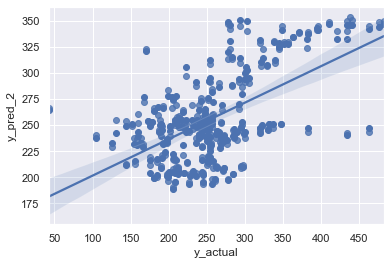

In [91]:
plt.scatter(y_act, y_pred)
plt.xlabel('y_actual')
plt.ylabel('y_pred_2')
sns.regplot(x = y_act, y = y_pred_2, )

In [90]:
metrics(y_act,y_pred_2)

R-square : 0.3501
Median absolute error : 35.25044
Mean squared error : 3311.6069
Mean absolute error : 42.93224
Mean absolute percentage error : 0.20247


In [84]:
ml_reg_2.score(x_2_ss, y_act)

0.3500986274831812

0.3500986274831812

In [85]:
#coefficient and intercept
ml_reg_2.coef_, ml_reg_2.intercept_

(array([44.75978027,  3.901151  ]), 256.2511848341232)

(array([44.75978027,  3.901151  ]), 256.2511848341232)

In [ ]:
#plt.scatter(y_act, y_pred)
plt.xlabel('y_actual')
plt.ylabel('y_pred')
sns.regplot(x = y_act, y = y_pred_2, )

In [ ]:
fp_2 = f_regression(x_2_ss, y)

In [ ]:
# result sof first trial
result_ml_2 = pd.DataFrame(fp_2, index=['F-value','P-value'], columns=['var1','var4'])

In [ ]:
result_ml_2

**Conclusion**

the performance of the regression for the first and second trial is the same 
